# Dataset 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("musk_csv.csv")

In [3]:
df

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0


In [4]:
df.isnull().sum() #check is there any empty row

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [8]:
col_list=list(df.columns.values) #to understand our dataset more precisily (unique fuction to see how many type of values are)
for i in range(len(col_list)):
    print(i,col_list[i],"\n")

0 ID 

1 molecule_name 

2 conformation_name 

3 f1 

4 f2 

5 f3 

6 f4 

7 f5 

8 f6 

9 f7 

10 f8 

11 f9 

12 f10 

13 f11 

14 f12 

15 f13 

16 f14 

17 f15 

18 f16 

19 f17 

20 f18 

21 f19 

22 f20 

23 f21 

24 f22 

25 f23 

26 f24 

27 f25 

28 f26 

29 f27 

30 f28 

31 f29 

32 f30 

33 f31 

34 f32 

35 f33 

36 f34 

37 f35 

38 f36 

39 f37 

40 f38 

41 f39 

42 f40 

43 f41 

44 f42 

45 f43 

46 f44 

47 f45 

48 f46 

49 f47 

50 f48 

51 f49 

52 f50 

53 f51 

54 f52 

55 f53 

56 f54 

57 f55 

58 f56 

59 f57 

60 f58 

61 f59 

62 f60 

63 f61 

64 f62 

65 f63 

66 f64 

67 f65 

68 f66 

69 f67 

70 f68 

71 f69 

72 f70 

73 f71 

74 f72 

75 f73 

76 f74 

77 f75 

78 f76 

79 f77 

80 f78 

81 f79 

82 f80 

83 f81 

84 f82 

85 f83 

86 f84 

87 f85 

88 f86 

89 f87 

90 f88 

91 f89 

92 f90 

93 f91 

94 f92 

95 f93 

96 f94 

97 f95 

98 f96 

99 f97 

100 f98 

101 f99 

102 f100 

103 f101 

104 f102 

105 f103 

106 f104 

107 f105 

108 f106 


In [10]:
#i drop the columns which are not useful in prediction
df = df.drop(['ID', 'molecule_name', 'conformation_name'], axis=1)

# Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED3AEBAA90>,
      dtype=object)

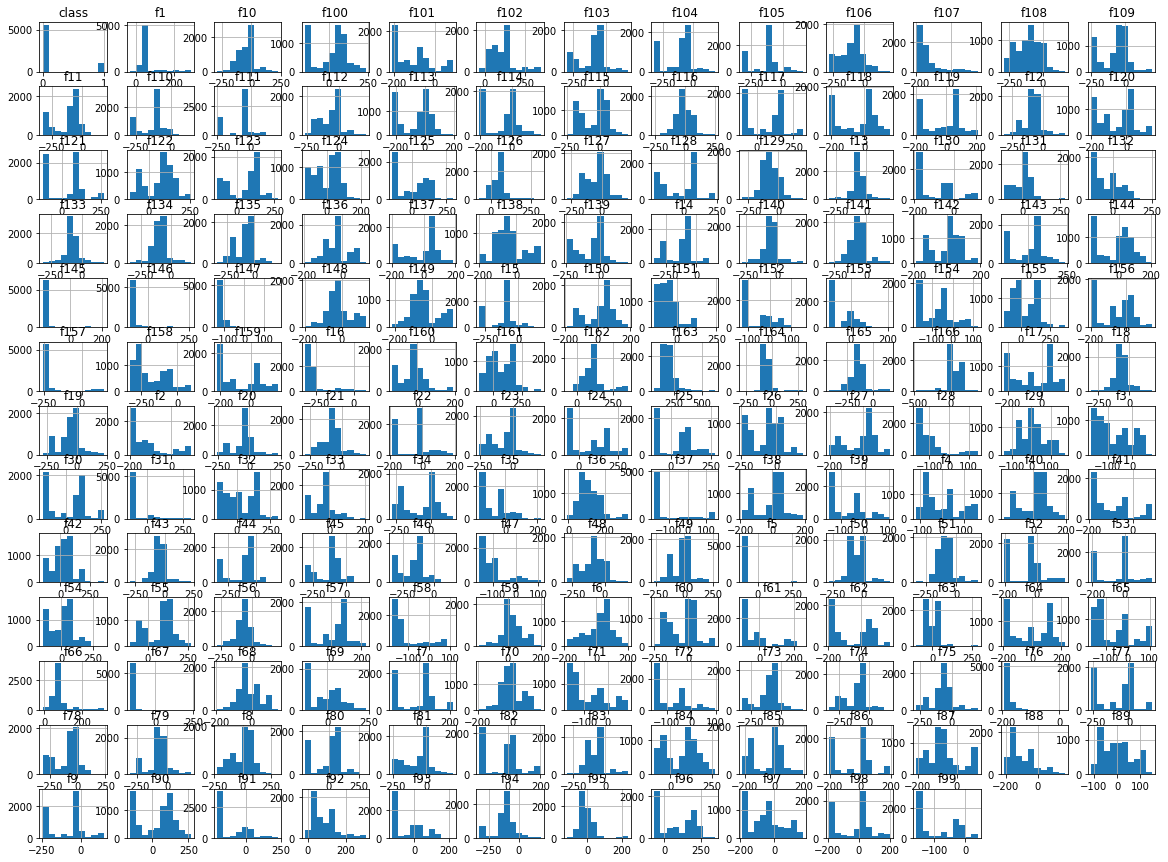

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=10, figsize= (20, 15))

In [16]:
corr_matrix = df.corr()
correlation=corr_matrix['class'].sort_values(ascending=False)

In [17]:
correlation #to see correlation of class with theother features

class    1.000000
f26      0.163585
f118     0.154010
f9       0.147509
f108     0.147264
           ...   
f96     -0.220994
f124    -0.224108
f126    -0.261096
f36     -0.264802
f132    -0.270949
Name: class, Length: 167, dtype: float64

In [18]:
X=df.drop(['class'],axis=1)#features
Y=df['class']#label

In [20]:
from sklearn.model_selection import train_test_split #split the dataset into train and test
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [24]:
#scaling
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [25]:
#make Artificial neutral network
from keras.models import Sequential#for model
from keras.layers import Dense#to add preceptrons
from keras.layers import LeakyReLU, PReLU, ELU# activation function
from keras.layers import Dropout

Using TensorFlow backend.
c:\users\girij\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\girij\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\girij\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [29]:
model= Sequential()
#adding the imput layer and the first hidden layer
model.add(Dense(units=100, kernel_initializer='he_uniform', activation='relu', input_dim=166))

In [30]:
#second layer
model.add(Dense(units=15, kernel_initializer= 'he_uniform', activation='relu'))
#third layer
model.add(Dense(units=10, kernel_initializer= 'he_uniform', activation='relu'))
#output layer
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [31]:
model.compile(optimizer= 'Adamax', loss= 'binary_crossentropy', metrics=['accuracy'])

In [32]:
model_history= model.fit(X_train, Y_train, validation_split=0.33, batch_size=10, epochs=50)

Train on 3536 samples, validate on 1742 samples
Epoch 1/50
3536/3536 [==============================] - 2s 624us/step - loss: 0.2237 - acc: 0.9200 - val_loss: 0.1469 - val_acc: 0.9346
Epoch 2/50
3536/3536 [==============================] - 1s 346us/step - loss: 0.1230 - acc: 0.9567 - val_loss: 0.1004 - val_acc: 0.9615
Epoch 3/50
3536/3536 [==============================] - 2s 467us/step - loss: 0.0887 - acc: 0.9675 - val_loss: 0.0821 - val_acc: 0.9719
Epoch 4/50
3536/3536 [==============================] - 1s 335us/step - loss: 0.0688 - acc: 0.9740 - val_loss: 0.0663 - val_acc: 0.9747
Epoch 5/50
3536/3536 [==============================] - 1s 344us/step - loss: 0.0561 - acc: 0.9788 - val_loss: 0.0662 - val_acc: 0.9730
Epoch 6/50
3536/3536 [==============================] - 1s 349us/step - loss: 0.0439 - acc: 0.9842 - val_loss: 0.0527 - val_acc: 0.9816
Epoch 7/50
3536/3536 [==============================] - 1s 324us/step - loss: 0.0330 - acc: 0.9921 - val_loss: 0.0470 - val_acc: 0.9834


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


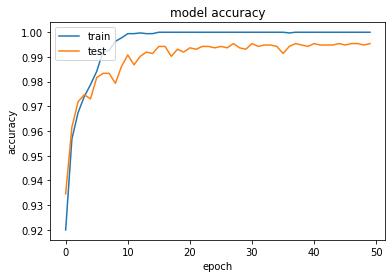

In [33]:
print(model_history.history.keys())
#summerize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

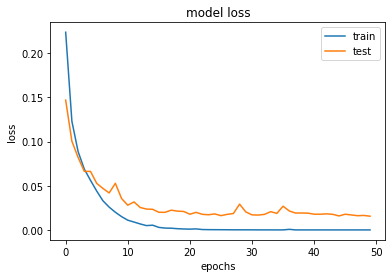

In [34]:
#summerize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [35]:
y_pred = model.predict(X_test)

In [37]:
y_pred = (y_pred > 0.5)

In [44]:
for st in y_pred:
    print(st)

[False]
[False]
[False]
[False]
[False]
[False]
[ True]
[False]
[False]
[False]
[False]
[ True]
[ True]
[ True]
[False]
[False]
[False]
[False]
[ True]
[ True]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[ True]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[ True]
[ True]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[ True]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[ True]
[False]
[False]
[False]
[False]
[False]
[False]
[ True]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[ True]
[False]
[False]
[ True]
[False]
[False]
[False]
[False]
[False]
[ True]
[False]
[ True]
[False]
[False]
[False]
[False]
[False]
[ True]
[False]
[False]
[ True]
[False]
[ True]
[False]
[False]


In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm=confusion_matrix(Y_test, y_pred)

In [41]:
cm

array([[1110,    1],
       [   7,  202]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, Y_test)

In [43]:
score

0.9939393939393939

In [46]:
from sklearn.metrics import average_precision_score

In [51]:
avg_pre = average_precision_score(Y_test,y_pred)

In [65]:
precision = avg_pre

In [50]:
from sklearn.metrics import f1_score

In [71]:
f1_score(Y_test, y_pred, average='macro')

0.9884959299994771

In [55]:
from sklearn.metrics import recall_score

In [66]:
recall= recall_score(Y_test, y_pred, average='macro')
recall

0.982803543512246